# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2
from keras.datasets import mnist

# Loading Data

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
x_train.shape #60K grayscale images in same size (28*28)

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
cv2.imshow("Image",x_train[0])
cv2.waitKey()

DisabledFunctionError: ignored

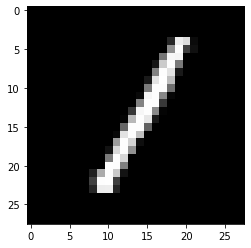

In [7]:
plt.imshow(x_train[55000],cmap="gray")#by default it is taking grayscale as rgb

In [8]:
y_train[55000]

1

# Preprocessing

#### 1. Reshape before building ANN 

In [9]:
x_train=x_train.reshape(60000,784)

In [10]:
x_train #each image 784 pxl values in a row

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
x_test=x_test.reshape(10000,784)

In [12]:
x_test.shape

(10000, 784)

#### 2. Scaling/ Normalization

*Because pixel values are in range 0 to 255*

In [13]:
from keras.utils import normalize

In [14]:
#this converts to 0-1 range
x_train=normalize(x_train)
x_test=normalize(x_test)

In [15]:
x_train.shape

(60000, 784)

#### 3. Encoding

In [16]:
y_train # Why Encoding? so that ANN gives same priority to all category(ohe)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_train=keras.utils.to_categorical(y_train)

In [18]:
y_train[59000]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Building ANN model

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [20]:
#Init model
model=Sequential()

In [21]:
#Input layer
model.add(Dense(input_dim=784,kernel_initializer="random_uniform",activation="relu",units=200))

In [22]:
#Hidden layer
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=200))

In [23]:
#Output layer
model.add(Dense(kernel_initializer="random_uniform",activation="softmax",units=10))

In [24]:
#Configure model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#Train Model

In [25]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3658 - accuracy: 0.8914
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1440 - accuracy: 0.9567
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0949 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0690 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0506 - accuracy: 0.9833
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0403 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0209 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.016

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


#Prediction

In [29]:
y_pred=model.predict_classes(x_test)

In [30]:
y_pred.shape

(10000,)

In [31]:
y_pred[0]

7

In [32]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9771